##  一、数据可视化和摘要

## 1.1  数据集摘要

### 1.1.1   数据介绍
根据Variety杂志的报道，“为了确定年度最热门的视频，YouTube使用了多种因素，包括衡量用户互动（观看次数，分享，评论和喜欢）。请注意，它们不是整个日历年中观看次数最多的视频“。 YouTube趋势列表中的优秀表演者是音乐视频（例如着名的男性化的“Gangam Style”），名人和/或真人秀电视节目，以及YouTube众所周知的随机照相机病毒视频。
此数据集是热门YouTube热门视频的每日记录。
该数据集包括每日热门YouTube视频的数月（和计数）数据。数据包括美国，GB，DE，CA和FR地区（分别为美国，英国，德国，加拿大和法国），每天最多可列出200个热门视频。数据集中包含各个地区的视频的[video_id], [trending_date], [title], [channel_title], [category_id],[publish_time], [tags], [views], [likes], [dislikes], [comment_count],[humbnail_link],[comments_disabled],[ratings_disable]，[ideo_error_or_removed],[description']等信息
      

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame,Series
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [3]:
filename='C:/Users/nancy/Downloads/YouTube/USvideos.csv'
df=pd.read_csv(filename)

In [3]:
cols = df.columns
print(df.shape)
print(cols)

(40949, 16)
Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')


数据一共有40949行,16列。
标称属性有[video_id], [trending_date], [title], [channel_title], [category_id],[publish_time], [tags],[humbnail_link],[comments_disabled],[ratings_disable]，[ideo_error_or_removed],[description']。
数值属性有[views], [likes], [dislikes],[comment_count]。


### 1.1.2   标称数据摘要
 标称数据中具有统计意义的信息统计了每个取值所对应的频数。分别是[channel_title], [category_id],[publish_time],[tags],[comments_disabled],[ratings_disable]


In [5]:
cname='channel_title'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

channel_title
12 News                                                2
1MILLION Dance Studio                                 33
1theK (원더케이)                                          19
20th Century Fox                                     135
2CELLOS                                                2
3Blue1Brown                                           14
3D Printing Nerd                                       6
42Fab - Metalworking and Multi-Medium Fabrication      5
494ta                                                  1
4given4ever1                                           6
5-Minute Crafts                                       22
52 Skillz                                              4
5FDPVEVO                                              19
5MadMovieMakers                                       17
5SOSVEVO                                              32
60 Minutes                                             4
730 WVFN                                               5
9-1-1 on FOX     

In [6]:
cname='category_id'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

category_id
1     2345
2      384
10    6472
15     920
17    2174
19     402
20     817
22    3210
23    3457
24    9964
25    2487
26    4146
27    1656
28    2401
29      57
43      57
dtype: int64


In [7]:
cname='publish_time'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

publish_time
2006-07-23T08:24:11.000Z     1
2008-04-05T18:22:40.000Z     4
2008-06-17T00:07:56.000Z     4
2008-08-07T12:16:58.000Z     3
2009-03-10T00:27:20.000Z     2
2009-06-08T01:55:32.000Z     1
2009-09-18T15:36:33.000Z     2
2009-09-29T16:27:28.000Z     1
2009-12-15T23:26:32.000Z     8
2010-01-14T15:56:31.000Z     2
2010-04-10T04:54:31.000Z     1
2010-04-21T16:09:03.000Z     1
2010-05-01T19:51:48.000Z     6
2010-05-11T01:17:49.000Z     3
2010-09-25T18:24:45.000Z     6
2011-03-01T04:14:08.000Z     5
2011-03-27T01:52:47.000Z     2
2011-03-27T04:31:25.000Z     1
2011-05-22T23:50:01.000Z     9
2011-05-29T17:03:12.000Z     4
2011-08-19T05:43:51.000Z     2
2011-11-10T22:02:04.000Z     2
2011-11-20T22:45:45.000Z     2
2012-01-02T23:42:16.000Z     2
2012-02-13T08:18:13.000Z     2
2012-03-24T22:03:40.000Z     3
2012-06-10T19:24:38.000Z     1
2012-09-06T04:21:39.000Z     3
2012-12-04T14:34:57.000Z     5
2012-12-10T17:48:48.000Z     4
2012-12-11T11:16:22.000Z     4
2013-03-10T16:41:59.000Z  

In [9]:
cname='tags'
print(df[cname].head())
df.groupby(by=cname).size()


0                                      SHANtell martin
1    last week tonight trump presidency|"last week ...
2    racist superman|"rudy"|"mancuso"|"king"|"bach"...
3    rhett and link|"gmm"|"good mythical morning"|"...
4    ryan|"higa"|"higatv"|"nigahiga"|"i dare you"|"...
Name: tags, dtype: object


tags
#MeToo|"Grammys 2018"|"Janelle Monáe"|"Kesha"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              2
#NeighborDanceChallenge|"#neighbor"|"#dance"|"#loveyourneighbors"|"#dreamer"|"#dancing"|"#musicvideo"|"#love"|"#iphone8"|"#iMovie"|"#iTunes"                                                                                                                                                                                                                          

In [10]:
cname='comments_disabled'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

comments_disabled
False    40316
True       633
dtype: int64


In [11]:
cname='ratings_disabled'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

ratings_disabled
False    40780
True       169
dtype: int64


In [12]:
cname='video_error_or_removed'
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
a=df.groupby(by=cname).size()
print(a)

video_error_or_removed
False    40926
True        23
dtype: int64


## 1.2  数据集可视化
 对[views], [likes], [dislikes],[comment_count]这四个数值属性给出了它们最大、最小、均值、中位数、四分位数及缺失值的个数。
 接着根据统计结果在剔除了缺失数据后绘制了它们的分布直方图，QQ图检和盒图，并对它们进行了分析。


### 1.2.1 [views]的可视化
根据下表可以看出[views]一共有40949条记录，均值为2360785，最小值为549，中位数为681861，剩下的四分位数分别为242329和18231570，最大值是225211900。

In [13]:
cname='views'
print(df[cname].describe())
loss=len(df)-df[cname].count()
print("缺失值个数：",loss)

count    4.094900e+04
mean     2.360785e+06
std      7.394114e+06
min      5.490000e+02
25%      2.423290e+05
50%      6.818610e+05
75%      1.823157e+06
max      2.252119e+08
Name: views, dtype: float64
缺失值个数： 0


 ###  [views]的直方图绘制

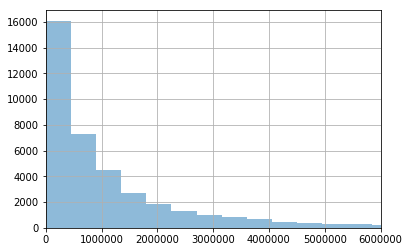

In [14]:
#直方图绘制
plt.xlim(0,6000000)
df[cname].hist(alpha=0.5,bins=500)
plt.show()

### [views] 的QQ图绘制

根据QQ图的绘制结果显示[views]不符合正态分布

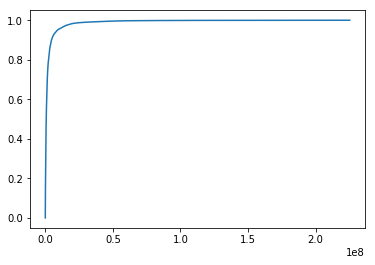

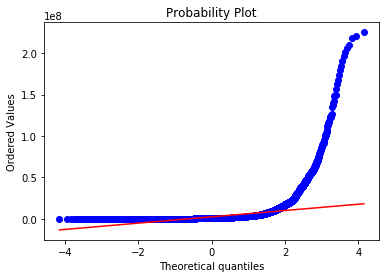

In [15]:
#累计分布图绘制
x=np.sort(df[cname])
y=np.arange(len(x))/float(len(x))
plt.plot(x,y)
plt.show()


#QQ图绘制
stats.probplot(df[cname], dist="norm", plot=plt)
plt.show()

 ###  [views]的盒图绘制
 
 通过绘制结果显示[views]中存在大的离群值（图中的黑色散点）

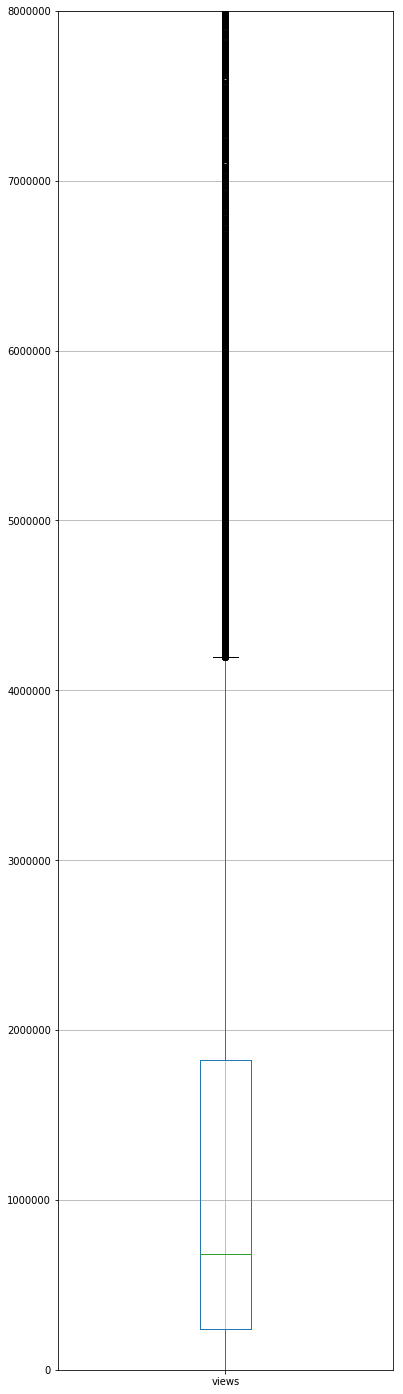

In [69]:
#盒图绘制
a=DataFrame(df,columns=[cname])
a.boxplot(figsize=(6,25))
plt.ylim(0,8000000)
plt.show()


## 1.2.2[likes]的可视化
 根据下表可以看出[likes]一共有4.094900e+04条记录，均值为7.426670e+04，最小值为0，中位数为 1.809100e+04，剩下的四分位数分别为5.424000e+03和5.541700e+04，最大值为 5.613827e+06。

In [16]:
cname='likes'
a=DataFrame(df,columns=[cname])
a=a.dropna()
print(a[cname].describe())
loss=len(df)-a[cname].count()
print("缺失值个数：",loss)


count    4.094900e+04
mean     7.426670e+04
std      2.288853e+05
min      0.000000e+00
25%      5.424000e+03
50%      1.809100e+04
75%      5.541700e+04
max      5.613827e+06
Name: likes, dtype: float64
缺失值个数： 0


### [likes]的直方图绘制

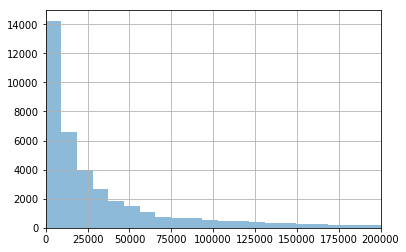

In [17]:
#直方图绘制
plt.xlim(0,200000)
a[cname].hist(alpha=0.5,bins=600)
plt.show()


### [likes]的QQ图绘制


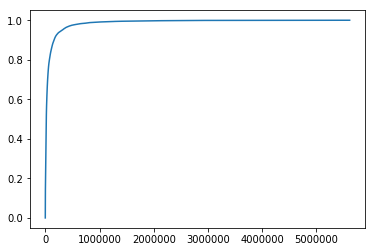

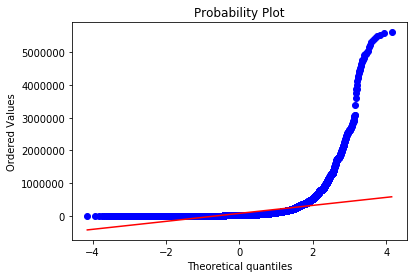

In [18]:
#累计分布图绘制
x1=np.sort(a[cname])
y1=np.arange(len(x1))/float(len(x1))
plt.plot(x1,y1)
plt.show()
#QQ图绘制
stats.probplot(a[cname], dist="norm", plot=plt)
plt.show()


### [likes]的盒图绘制
 绘制结果显示[likes]中存在大的离群值（图中的黑色散点）

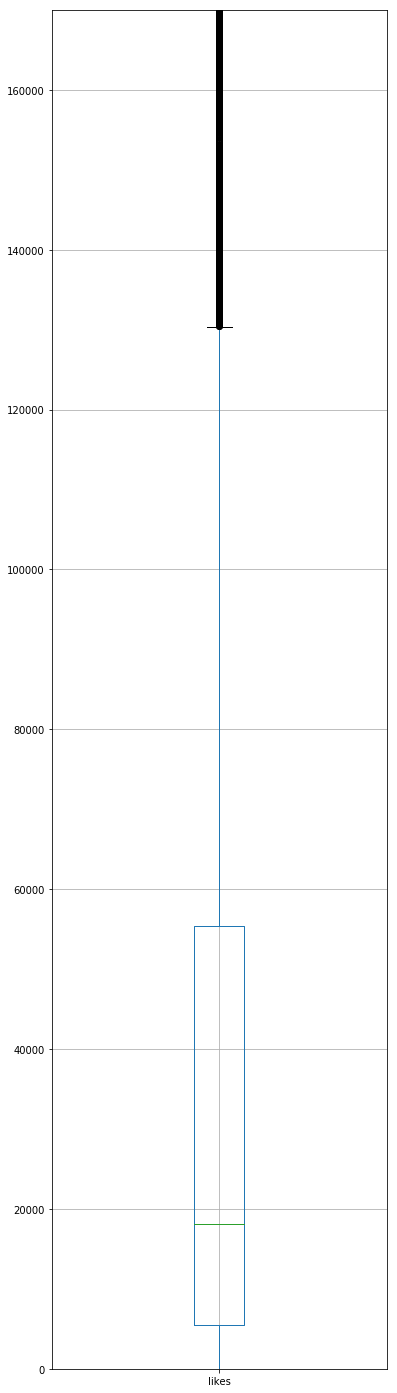

In [19]:
#盒图绘制
a.boxplot(figsize=(6,25))
plt.ylim(0,170000)
plt.show()


 ## 1.2.3 [dislikes]的可视化
根据下表可以看出[dislikes]一共有4.094900e+04条记录，均值为3.711401e+03，最小值为0，中位数为 6.310000e+02，剩下的四分位数分别为2.020000e+02和1.938000e+03，最大值是 1.674420e+06。

In [20]:
cname='dislikes'
a=DataFrame(df,columns=[cname])
a=a.dropna()#去除缺失值
print(a[cname].describe())
loss=len(df)-a[cname].count()
print("缺失值个数：",loss)

count    4.094900e+04
mean     3.711401e+03
std      2.902971e+04
min      0.000000e+00
25%      2.020000e+02
50%      6.310000e+02
75%      1.938000e+03
max      1.674420e+06
Name: dislikes, dtype: float64
缺失值个数： 0


### [dislikes]的直方图绘制


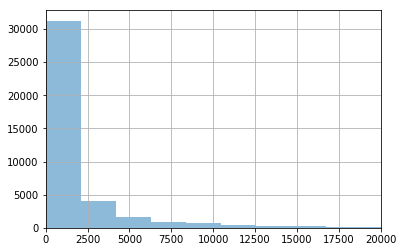

In [21]:

#直方图绘制
plt.xlim(0,20000)
a[cname].hist(alpha=0.5,bins=800)
plt.show()

### [dislikes]的QQ图绘制

根据QQ图的绘制结果显示[dislikes]不符合正态分布

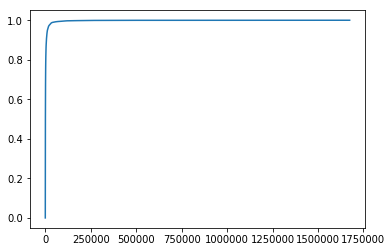

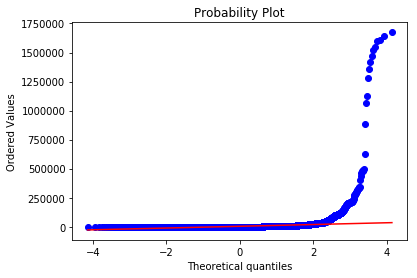

In [22]:

#累计分布图绘制
x1=np.sort(a[cname])
y1=np.arange(len(x1))/float(len(x1))
plt.plot(x1,y1)
plt.show()


#QQ图绘制
stats.probplot(a[cname], dist="norm", plot=plt)
plt.show()

### [dislikes]的盒图绘制
绘制结果显示[dislikes]中存在大的离群值（图中的黑色散点）

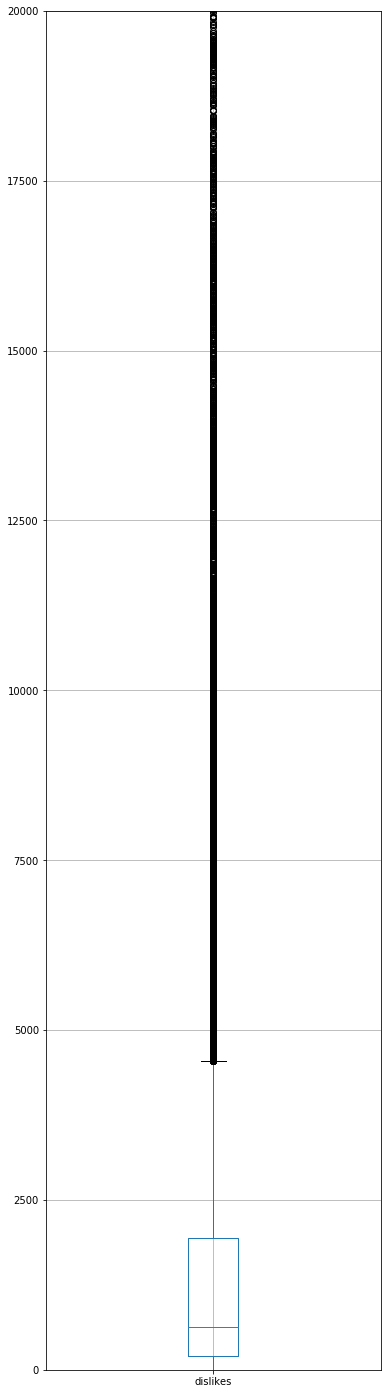

In [23]:

#盒图绘制
a.boxplot(figsize=(6,25))
plt.ylim(0,20000)
plt.show()


## 1.2.4 [comment_count]的可视化
根据下表显示 [comment_count]一共有 4.094900e+04条记录，均值为8.446804e+03，最小值为0，中位数为1.856000e+03，剩下的四分位数分别为6.140000e+02和5.755000e+03，最大值为1.361580e+06。

In [24]:
cname='comment_count'
a=DataFrame(df,columns=[cname])
a=a.dropna()
print(a[cname].describe())
loss=len(df)-a[cname].count()
print("缺失值个数：",loss)


count    4.094900e+04
mean     8.446804e+03
std      3.743049e+04
min      0.000000e+00
25%      6.140000e+02
50%      1.856000e+03
75%      5.755000e+03
max      1.361580e+06
Name: comment_count, dtype: float64
缺失值个数： 0


### [comment_count]的直方图绘制

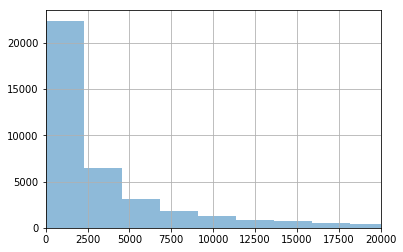

In [25]:
plt.xlim(0,20000)
a[cname].hist(alpha=0.5,bins=600)
plt.show()


### [comment_count]的QQ图绘制

绘制结果显示 [comment_count]不符合正态分布

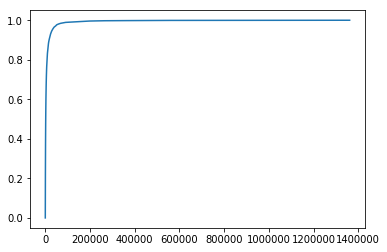

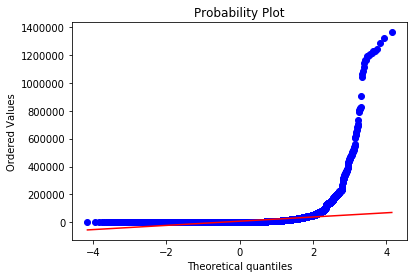

In [26]:
#累计分布图绘制
x1=np.sort(a[cname])
y1=np.arange(len(x1))/float(len(x1))
plt.plot(x1,y1)
plt.show()


#QQ图绘制
stats.probplot(a[cname], dist="norm", plot=plt)
plt.show()


### [comment_count]的盒图绘制
绘制结果显示[comment_count]中存在大的离群值（图中的黑色散点）

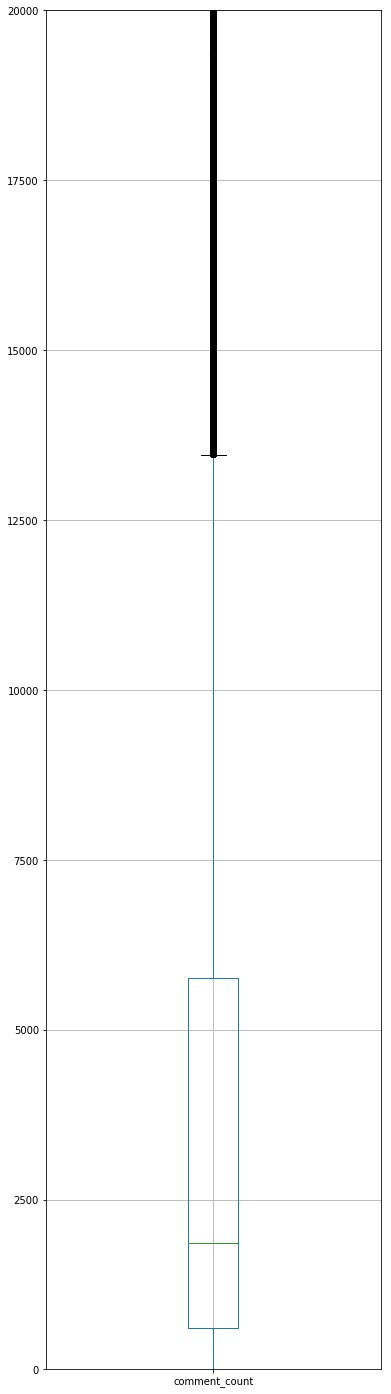

In [27]:
#盒图绘制
a.boxplot(figsize=(6,25))
plt.ylim(0,20000)
plt.show()